# 3.1一元分散分析

In [34]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline
sns.set()

In [35]:
data1 = pd.read_csv('Lesson7-1.csv')
data1

,Body_Length,Body_Height,Feed
0,34.873,8.597,A
1,28.165,5.555,A
2,28.415,3.874,A
3,26.781,3.084,A
4,32.596,6.270,A
5,23.095,5.232,A
6,35.234,3.968,A
7,27.716,5.131,A
8,30.957,3.140,A
9,29.252,7.094,A


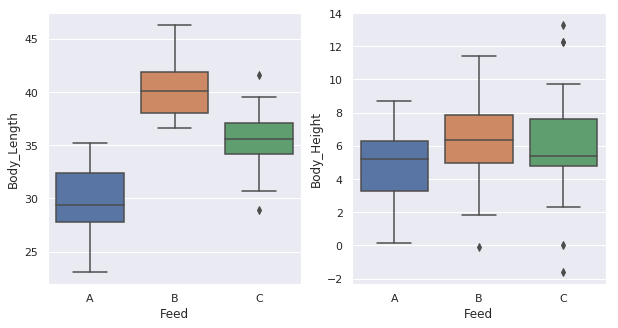

In [36]:
f, axes = plt.subplots(1, 2, figsize = (10,5))
# plt.subplots()は、FigureオブジェクトとAxesオブジェクトを含むタプルを返す関数
# fはFigure(図全体の情報。10インチ5インチ)をタプルとして格納
# axesはAxes(座標軸の情報。タテ1行ヨコ2列)をタプルとして格納
# Axesオブジェクト(図の中の座標軸を表す)は、必ず親のFigureオブジェクトをを持つ

sns.boxplot(x='Feed', y='Body_Length', data=data1, ax=axes[0])
sns.boxplot(x='Feed', y='Body_Height', data=data1, ax=axes[1])

# ax=axes[0]はグラフを置く場所（座標軸）を指定。
# 例えばplt.subplots(2,2)とすれば、左上：axes[0,0]、右下：axes[1,1]

In [37]:
# まずは飼料ごとに体長の平均を出します。
me_Feed_A = sp.mean(data1.query('Feed == "A"')['Body_Length'])
me_Feed_B = sp.mean(data1.query('Feed == "B"')['Body_Length'])
me_Feed_C = sp.mean(data1.query('Feed == "C"')['Body_Length'])
print('Feed A:', me_Feed_A)
print('Feed B:', me_Feed_B)
print('Feed C:', me_Feed_C)

Feed A: 29.8201
Feed B: 40.2296
Feed C: 35.49113333333334


In [38]:
# 次に体長データ全体の平均を計算します。
mu_all = sp.mean(data1['Body_Length'])
mu_all

35.18027777777779

# 効果の分散の大きさを計算

In [39]:
# 各群平均が30個ずつ並んだ90個のndarrayを生成
effect = [29.820]*30 + [40.230]*30 + [35.491]*30
effect = np.array(effect)

# 効果 (＝各群平均の、データ全体平均からのズレ)
effect - mu_all

array([-5.36027778, -5.36027778, -5.36027778, -5.36027778, -5.36027778,
       -5.36027778, -5.36027778, -5.36027778, -5.36027778, -5.36027778,
       -5.36027778, -5.36027778, -5.36027778, -5.36027778, -5.36027778,
       -5.36027778, -5.36027778, -5.36027778, -5.36027778, -5.36027778,
       -5.36027778, -5.36027778, -5.36027778, -5.36027778, -5.36027778,
       -5.36027778, -5.36027778, -5.36027778, -5.36027778, -5.36027778,
        5.04972222,  5.04972222,  5.04972222,  5.04972222,  5.04972222,
        5.04972222,  5.04972222,  5.04972222,  5.04972222,  5.04972222,
        5.04972222,  5.04972222,  5.04972222,  5.04972222,  5.04972222,
        5.04972222,  5.04972222,  5.04972222,  5.04972222,  5.04972222,
        5.04972222,  5.04972222,  5.04972222,  5.04972222,  5.04972222,
        5.04972222,  5.04972222,  5.04972222,  5.04972222,  5.04972222,
        0.31072222,  0.31072222,  0.31072222,  0.31072222,  0.31072222,
        0.31072222,  0.31072222,  0.31072222,  0.31072222,  0.31

In [40]:
# 効果の平方和(群間平方和)
squares_feed = sp.sum((effect - mu_all)**2)
squares_feed

1629.8646202777766

# 誤差の分散の大きさを計算

In [42]:
#誤差
resid = data1['Body_Length'] - effect

#誤差の平方和
squares_resid = sp.sum(resid **2)
squares_resid

669.882917

# 自由度 （標本数n-1）

In [43]:
df_all = len(data1)-1 #全体の自由度（全てのデータ個数-1）
df_feed = 3-1  #飼料の自由度（飼料の水準数-1)
df_resid = df_all - df_feed #誤差の自由度 (全体の自由度 – 飼料の自由度)

print(df_all, df_feed, df_resid)

89 2 87


# 飼料の分散

In [44]:
variance_feed=(squares_feed / df_feed)
variance_feed

814.9323101388883

# 誤差の分散

In [45]:
variance_resid = (squares_resid / df_resid)
variance_resid

7.699803643678161

# F比とp値の計算

In [46]:
f_latio = variance_feed / variance_resid
f_latio

105.83806391062706

In [47]:
alpha = sp.stats.f.cdf(x=f_latio, dfn=df_feed, dfd=df_resid)
p_value = 1-alpha
p_value

1.1102230246251565e-16

# statsmodelsモジュールで簡易計算＝分散分析表

In [48]:
anova_model_1 = smf.ols('Body_Length ~ Feed', data=data1).fit()
sm.stats.anova_lm(anova_model_1, typ=2)

,sum_sq,df,F,PR(>F)
Feed,1629.713757,2.0,105.828268,5.001548e-24
Residual,669.882911,87.0,NaN,NaN


In [49]:
# 体高をもとに一元分散分析をする場合
anova_model2 = smf.ols('Body_Height ~ Feed', data=data1).fit()
sm.stats.anova_lm(anova_model2, typ=2)

,sum_sq,df,F,PR(>F)
Feed,28.056643,2.0,1.819162,0.168276
Residual,670.893326,87.0,NaN,NaN


# 3.2二元分散分析

# 二元分散分析の分散分析表

    因子＼値	平方和	自由度	F比	p値
    飼料	 	 	 	 
    養殖池	 	 	 	 
    残差	 	 	 	 

In [12]:
data2 = pd.read_csv('Lesson7-2.csv')
data2

,Body_Length,Feed,Area
0,34.873,A,X
1,28.165,A,X
2,28.415,A,X
3,26.781,A,X
4,32.596,A,X
5,23.095,A,X
6,35.234,A,X
7,27.716,A,X
8,30.957,A,X
9,29.252,A,X


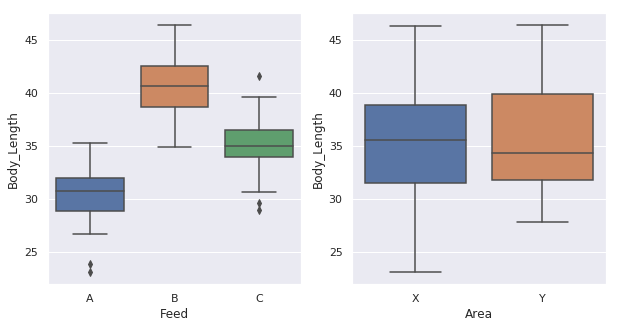

In [13]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x='Feed', y='Body_Length', data=data2, ax=ax[0])
sns.boxplot(x='Area', y='Body_Length', data=data2, ax=ax[1])

In [62]:
# データ全体の平均
me_all2 = sp.mean(data2['Body_Length'])
me_all2

35.382866666666665

In [63]:
# 飼料ごとの平均
me_Feed_A = sp.mean(data2.query('Feed=="A"')['Body_Length'])
me_Feed_B = sp.mean(data2.query('Feed=="B"')['Body_Length'])
me_Feed_C = sp.mean(data2.query('Feed=="C"')['Body_Length'])
print('Feed A:', me_Feed_A)
print('Feed B:', me_Feed_B)
print('Feed C:', me_Feed_C)

Feed A: 30.373166666666666
Feed B: 40.664166666666674
Feed C: 35.11126666666668


In [64]:
# 養殖池ごとの平均
me_Area_X = sp.mean(data2.query('Area=="X"')['Body_Length'])
me_Area_Y = sp.mean(data2.query('Area=="Y"')['Body_Length'])
print('Area X:', me_Area_X)
print('Area Y:', me_Area_Y)

Area X: 35.18027777777779
Area Y: 35.58545555555555


# 平方和の計算（＝分散の大きさ）

In [65]:
# 全体の平方和
squares_all2 = sp.sum((data2['Body_Length']-me_all2)**2)
squares_all2

4304.4535108

In [66]:
# 飼料の平方和
feed = [me_Feed_A]*60 +[me_Feed_B]*60 +[me_Feed_C]*60
feed = np.array(feed)
squares_feed = sp.sum((feed - me_all2)**2)
squares_feed

3183.7794204000047

In [67]:
# 養殖池の平方和
area = [me_Area_X]*90 + [me_Area_Y]*90
area = np.array(area)
squares_area = sp.sum((area - me_all2)**2)
squares_area

7.387606422221529

In [68]:
# 誤差の平方和
squares_resid2 = squares_all2 - squares_feed - squares_area
squares_resid2

1113.2864839777737

# 各種自由度の計算

In [69]:
df_all2 = len(data2)-1
df_feed = 3-1
df_area = 2-1
df_resid2 = df_all2 - (df_feed + df_area)

print(df_all2, df_feed, df_area, df_resid2)

179 2 1 176


# 分散の計算
（標本分散s^2を自由度n-1で割って不偏分散に）

In [70]:
# 飼料の分散
variance_feed = squares_feed / df_feed
variance_feed

1591.8897102000024

In [71]:
# 養殖池の分散
variance_area = squares_area / df_area
variance_area

7.387606422221529

In [72]:
# 誤差の分散
variance_resid2 = squares_resid2 / df_resid2
variance_resid2

6.325491386237351

# f値とp値の計算

In [74]:
# 飼料のf値
f_ratio_feed = variance_feed/ variance_resid2
f_ratio_feed

251.66261607178006

In [76]:
# 養殖池のf値
f_ratio_area = variance_area / variance_resid2
f_ratio_area

1.1679102809775488

In [77]:
# 飼料のp値
1 - sp.stats.f.cdf(x=f_ratio_feed, dfn=df_feed, dfd=df_resid)

1.1102230246251565e-16

In [78]:
# 養殖池のp値
1 - sp.stats.f.cdf(x=f_ratio_area, dfn=df_area, dfd=df_resid)

0.28281772012731476

# statsmodelsモジュールを用いた二元分散分析

In [80]:
anova_model_3 = smf.ols('Body_Length ~ Feed + Area', data=data2).fit()
sm.stats.anova_lm(anova_model_3, typ=2)

,sum_sq,df,F,PR(>F)
Feed,3183.779420,2.0,251.662616,2.411422e-52
Area,7.387606,1.0,1.167910,2.813097e-01
Residual,1113.286484,176.0,NaN,NaN
